### Importing all the basic required libraires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importingdatasets

In [2]:
X_train= pd.read_csv('Dataset/train.csv')
y_train= pd.read_csv('Dataset/train_label.csv',header=None)
X_test=pd.read_csv('Dataset/test.csv')
y_test = pd.read_csv('Dataset/test_label.csv',header=None)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(8708, 9) (8708, 1) (2178, 9) (2178, 1)


## creating a copy of train dataset and add adding train traget to perform EDA on data3

In [3]:
df=X_train.copy()

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [5]:
df['target']=y_train.values

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,target
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
converting datetime column to 

# EDA

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,target
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [11]:
def toDatetime(data,col):
    data[col]=pd.to_datetime(data[col])
#     return data

In [12]:
toDatetime(X_train,'datetime')
toDatetime(X_test,'datetime')

In [13]:
df.tail(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,target
8706,2012-11-07 01:00:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92
8707,2011-01-10 10:00:00,Spring,0,1,Mist + Cloudy,5.74,6.060,50,19.9995,31


In [14]:
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour

In [15]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,target,year,month,day,hour
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,5,2,19
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,9,5,4
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,1,13,9
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,11,18,16
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,9,13,13


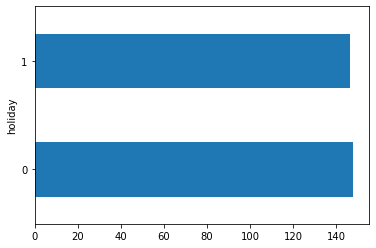

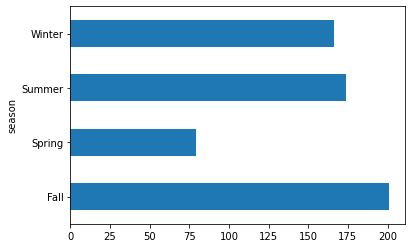

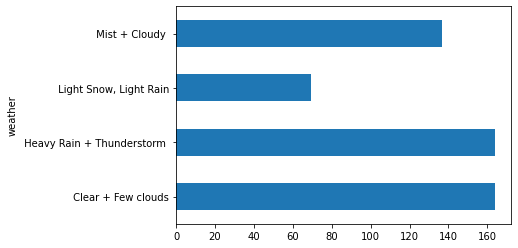

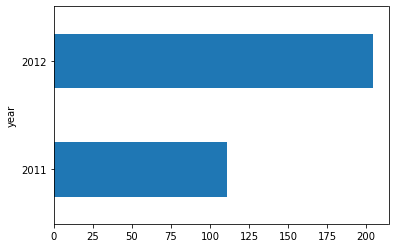

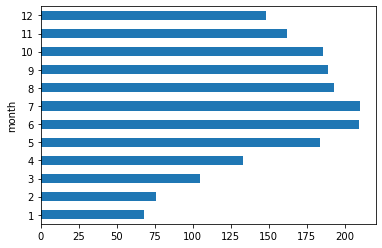

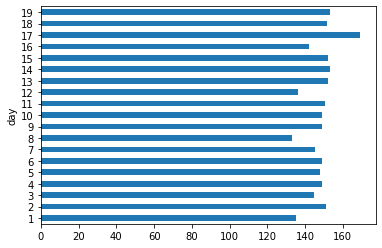

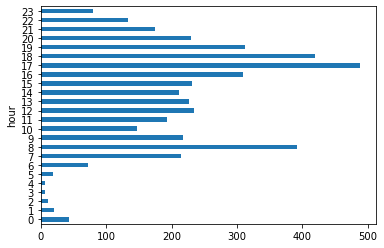

In [16]:
for i in ['holiday','season','weather','year','month','day','hour']:
    df.groupby(i)['target'].median().plot.barh()
    plt.show()
    

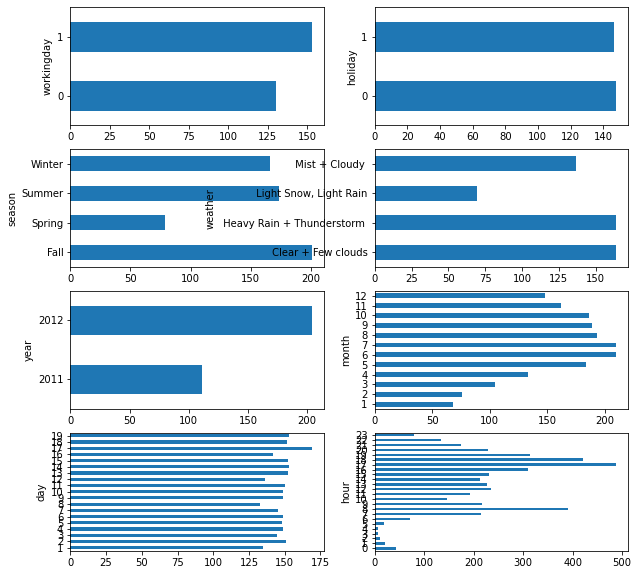

In [17]:
plt.figure(figsize=(10,10))
for index,col in enumerate(['workingday','holiday','season','weather','year','month','day','hour']):
    plt.subplot(4,2,index+1)
    df.groupby(col)['target'].median().plot.barh()
plt.show()

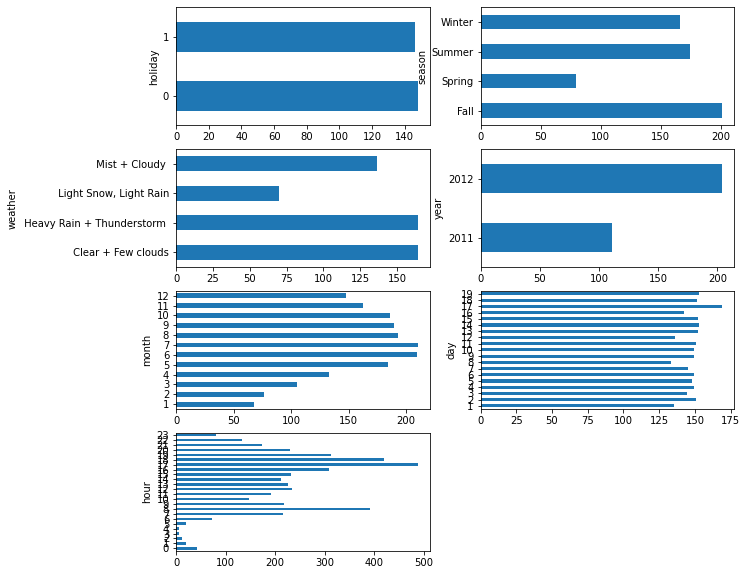

In [18]:
lst=['holiday','season','weather','year','month','day','hour']
plt.figure(figsize=(10,10))
for i in range(len(lst)):
    plt.subplot(4,2,i+1)
    df.groupby(lst[i])['target'].median().plot.barh()
plt.show()

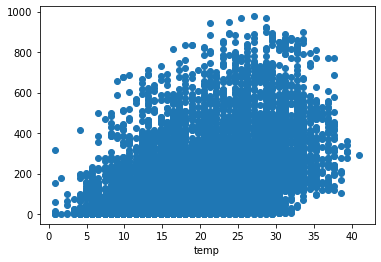

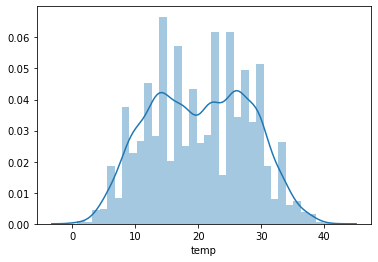

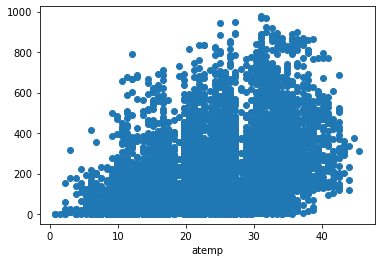

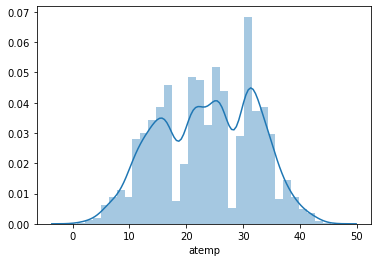

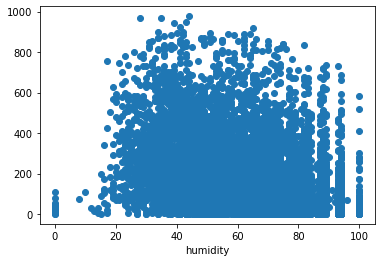

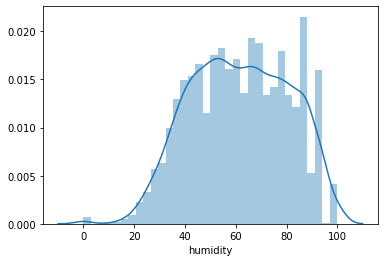

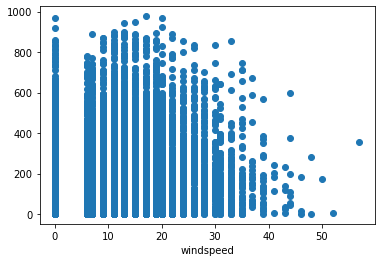

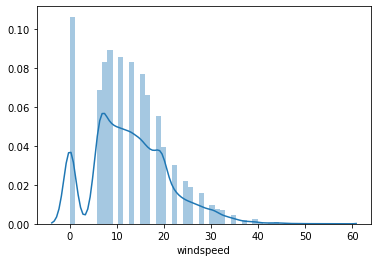

In [19]:
for i in ['temp','atemp','humidity','windspeed']:
    plt.scatter(df[i],df.target)
    plt.xlabel(i)
    plt.show()
    sns.distplot(df[i])
    plt.show()

In [20]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,target,year,month,day,hour
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,5,2,19
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,9,5,4
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,1,13,9
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,11,18,16
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,9,13,13


In [21]:
def clean_data(data):
    data['year']=data['datetime'].dt.year
    data['hour']=data['datetime'].dt.hour

In [22]:
clean_data(X_train)
clean_data(X_test)

In [23]:
y_train

,0
0,504
1,5
2,139
3,209
4,184
...,...
8703,13
8704,11
8705,1
8706,92


In [24]:
X_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012,19
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012,4
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011,9
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011,16
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011,13
...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-01-16 06:00:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,2012,6
8704,2011-11-10 01:00:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,2011,1
8705,2011-04-12 03:00:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,2011,3
8706,2012-11-07 01:00:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,2012,1


In [25]:
X_test=pd.get_dummies(X_test,drop_first=True)
X_train = pd.get_dummies(X_train,drop_first=True)

In [26]:
X_test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-10 11:00:00,0,1,21.32,25.000,48,35.0008,2012,11,0,1,0,0,0
1,2012-06-09 07:00:00,0,0,23.78,27.275,64,7.0015,2012,7,0,1,0,0,0
2,2011-03-06 20:00:00,0,0,11.48,12.120,100,27.9993,2011,20,1,0,0,1,0
3,2011-10-13 11:00:00,0,1,25.42,28.790,83,0.0000,2011,11,0,0,1,0,1
4,2012-06-02 12:00:00,0,0,25.42,31.060,43,23.9994,2012,12,0,1,0,0,0


In [27]:
X_train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-02 19:00:00,0,1,22.14,25.760,77,16.9979,2012,19,0,1,0,0,0,0
1,2012-09-05 04:00:00,0,1,28.70,33.335,79,19.0012,2012,4,0,0,0,0,0,0
2,2011-01-13 09:00:00,0,1,5.74,6.060,50,22.0028,2011,9,1,0,0,0,0,0
3,2011-11-18 16:00:00,0,1,13.94,16.665,29,8.9981,2011,16,0,0,1,0,0,0
4,2011-09-13 13:00:00,0,1,30.34,33.335,51,19.0012,2011,13,0,0,0,0,0,0


In [28]:
X_test['weather_ Heavy Rain + Thunderstorm ']=np.zeros(len(X_test))

In [29]:
X_test.head(1)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,weather_ Heavy Rain + Thunderstorm
0,2012-05-10 11:00:00,0,1,21.32,25.0,48,35.0008,2012,11,0,1,0,0,0,0.0


In [30]:
X_train.head(1)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-02 19:00:00,0,1,22.14,25.76,77,16.9979,2012,19,0,1,0,0,0,0


In [31]:
X_test.values

array([[Timestamp('2012-05-10 11:00:00'), 0, 1, ..., 0, 0, 0.0],
       [Timestamp('2012-06-09 07:00:00'), 0, 0, ..., 0, 0, 0.0],
       [Timestamp('2011-03-06 20:00:00'), 0, 0, ..., 1, 0, 0.0],
       ...,
       [Timestamp('2012-03-07 22:00:00'), 0, 1, ..., 0, 0, 0.0],
       [Timestamp('2011-05-12 05:00:00'), 0, 1, ..., 0, 0, 0.0],
       [Timestamp('2012-07-18 16:00:00'), 0, 1, ..., 0, 0, 0.0]],
      dtype=object)

In [32]:
X_train.values

array([[Timestamp('2012-05-02 19:00:00'), 0, 1, ..., 0, 0, 0],
       [Timestamp('2012-09-05 04:00:00'), 0, 1, ..., 0, 0, 0],
       [Timestamp('2011-01-13 09:00:00'), 0, 1, ..., 0, 0, 0],
       ...,
       [Timestamp('2011-04-12 03:00:00'), 0, 1, ..., 0, 0, 1],
       [Timestamp('2012-11-07 01:00:00'), 0, 1, ..., 0, 0, 1],
       [Timestamp('2011-01-10 10:00:00'), 0, 1, ..., 0, 0, 1]],
      dtype=object)

In [33]:
X_test.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'hour', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_ Light Snow, Light Rain',
       'weather_ Mist + Cloudy ', 'weather_ Heavy Rain + Thunderstorm '],
      dtype='object')

In [34]:
X_test=X_test[['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'hour', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_ Heavy Rain + Thunderstorm ', 'weather_ Light Snow, Light Rain',
       'weather_ Mist + Cloudy ']]

In [35]:
X_train.head(1)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-02 19:00:00,0,1,22.14,25.76,77,16.9979,2012,19,0,1,0,0,0,0


In [36]:
X_test.head(1)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-10 11:00:00,0,1,21.32,25.0,48,35.0008,2012,11,0,1,0,0.0,0,0


In [37]:
X_test['weather_ Heavy Rain + Thunderstorm '] =X_test['weather_ Heavy Rain + Thunderstorm '].astype(int)

In [38]:
X_test.head(1)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-10 11:00:00,0,1,21.32,25.0,48,35.0008,2012,11,0,1,0,0,0,0


In [39]:
X_test.drop('datetime',axis=1,inplace=True)
X_train.drop('datetime',axis=1,inplace=True)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [41]:
rf = RandomForestRegressor()
lr=LinearRegression()
xgb =XGBRegressor()

In [42]:
rf.fit(X_train.values,y_train.values)
lr.fit(X_train,y_train)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
rf.score(X_test,y_test)

0.9393758124518804

In [44]:
lr.score(X_test,y_test)

0.3983812851140084

In [45]:
xgb.score(X_test,y_test)

0.9438839174502912

In [46]:
pip install tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=44ae3e1d772b5f5a7ac473c5e9ae0f7e9ab4e7380ec7e4f0d6ba5fe622f249